In [11]:
import cv2, numpy, time
from imutils.video import WebcamVideoStream, FPS
%matplotlib inline
import matplotlib as plt

In [20]:
class Brick():
    def __init__(self, color=None, part_id=None, p_fall1=None, p_fall2=None, img = None):
        self.color = color
        self.part_id = part_id
        self.p_fall1 = p_fall1
        self.p_fall2 = p_fall2
        self.p_length = p_fall1 - p_fall2
        self.img = img
white_img = numpy.full((480, 640, 3), 255)
min_white = numpy.array([170, 170, 160])
white_px = numpy.array([255, 255, 255])
def conveyor_to_white(inp):
    sh = inp.shape
    for x in range(sh[1]):
        for y in range(sh[0]):
            if numpy.all(inp[y, x] >= min_white):
                inp[y, x] = white_px
    return inp
def conveyor_to_white2(inp):
    conb = inp[:, :, 0] > 160
    cong = inp[:, :, 1] > 170
    conr = inp[:, :, 2] > 170
    con = numpy.zeros((480, 640))
    con[conb] += 1
    con[cong] += 1
    con[conr] += 1
    inp[con[:, :] == 3] = [255, 255, 255]
    return inp

def auto_crop(inp):
    sh = inp.shape
    mask = img == [255, 255, 255]
    xs = []
    ys = []
    for x in range(sh[1]):
        if numpy.all(mask[:, x]):
            xs.append(x)
    
    for y in range(sh[0]):
        if numpy.all(mask[y, :]):
            ys.append(y)
    if not (xs or ys):
        return False, False
    x1 = min(xs)
    x2 = max(xs)
    y1 = min(ys)
    y2 = max(ys)
    print(x1, x2, "\t", y1, y2)
    return inp[x1:x2, y1:y2], (x1, x2, y1, y2)
def auto_crop2(img):
    mask = img == [255, 255, 255]
    return img[numpy.ix_(mask.any(1),mask.any(0))]

def check_on_brick(inp):
    cr, a = auto_crop2(inp)
    if not a:
        return False
    x1, x2, y1, y2 = a
    h, w, d = inp.shape
    print(a)
    if h/6 < x1:#linker rand
        if h - (h/6) > x2:#rechter rand
            if y1 > 5 and h-y1 > 5:
                return cr
    return False


In [5]:
vstream = WebcamVideoStream(src=0).start()

In [6]:
frames = []
n = 500
start = time.perf_counter()
for i in range(n):
    frames.append(vstream.read())
    time.sleep(1/30)
stop = time.perf_counter()
print(stop-start, (stop-start)/n)

17.059317539032264 0.03411863507806453


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

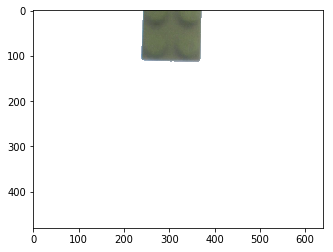

In [29]:
cap = cv2.VideoCapture(0)
out = cv2.VideoWriter('output_test2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (640, 480))
inp = cv2.VideoCapture()
inp.open('output_test.avi')
#cap.set(cv2.CAP_PROP_SETTINGS, 0)
cap.set(cv2.CAP_PROP_WHITE_BALANCE_BLUE_U, 2700)
cap.set(cv2.CAP_PROP_WHITE_BALANCE_RED_V, 2700)
cap.set(cv2.CAP_PROP_BRIGHTNESS, 1)
cap.set(cv2.CAP_PROP_EXPOSURE, -11)
#time.sleep(20)
coss = []
for f in range(300):
    print(f)
    ret, fr = inp.read()
    if ret:
        #print(fr.shape)
        #
        fr = conveyor_to_white2(fr)
        """co = check_on_brick(fr)
        if co:
            coss.append(co)
            plt.pyplot.imshow(co)
        #"""
        imgray = cv2.cvtColor(fr,cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(imgray,250,255,0)
        im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            if x == y == 0:
                continue
            elif w < 16 or h < 16:
                continue
            cv2.rectangle(fr, (x, y), (x+w, y+h), (255,0,0), 2)
        out.write(fr)
        #time.sleep(0.033333333333333)
    else:
        print(ret)
plt.pyplot.imshow(fr)
out.release()
cap.release()

In [4]:
plt.pyplot.imshow(coss[0])

IndexError: list index out of range

True [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


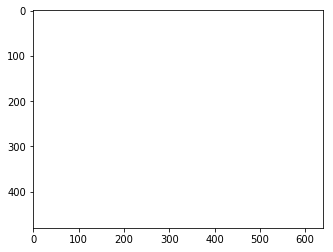

In [3]:
cap = cv2.VideoCapture(0)
cap.set(10, 1)
ret, fr = cap.read()
print(ret, fr)
plt.pyplot.imshow(fr)
cap.release()

In [22]:
mask = numpy.array([[True, True, True], [True, False, True], [True, True, True]])
mask

array([[ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True]])